## Dataset description

### This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

### Importing our libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Loading our data:

In [2]:
df = pd.read_csv("heart_disease_data.csv")

# Print first 5 rows:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Data exploration and processing

In [3]:
# Getting how many rows an columns we have:
df.shape

(303, 14)

In [4]:
# More information about our data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# Getting a statistical summary of the data:
df.describe().round()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0
mean,54.0,1.0,1.0,132.0,246.0,0.0,1.0,150.0,0.0,1.0,1.0,1.0,2.0,1.0
std,9.0,0.0,1.0,18.0,52.0,0.0,1.0,23.0,0.0,1.0,1.0,1.0,1.0,0.0
min,29.0,0.0,0.0,94.0,126.0,0.0,0.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,48.0,0.0,0.0,120.0,211.0,0.0,0.0,134.0,0.0,0.0,1.0,0.0,2.0,0.0
50%,55.0,1.0,1.0,130.0,240.0,0.0,1.0,153.0,0.0,1.0,1.0,0.0,2.0,1.0
75%,61.0,1.0,2.0,140.0,274.0,0.0,1.0,166.0,1.0,2.0,2.0,1.0,3.0,1.0
max,77.0,1.0,3.0,200.0,564.0,1.0,2.0,202.0,1.0,6.0,2.0,4.0,3.0,1.0


In [6]:
# check for missing values:

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
# check for duplicated values:

df.duplicated().sum()

1

In [8]:
# drop the duplicated value:

df.drop_duplicates(inplace = True)

In [9]:
# check for duplicated values again:

df.duplicated().sum()

0

In [10]:
# check how many people have heart disease and how many are not:

df["target"].value_counts()

1    164
0    138
Name: target, dtype: int64

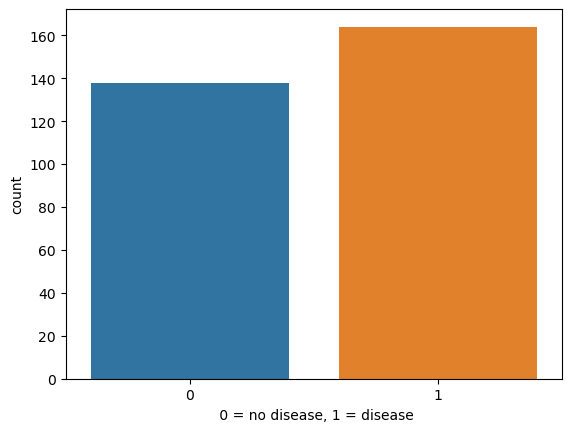

In [11]:
sns.countplot(x = "target", data = df)
plt.xlabel(" 0 = no disease, 1 = disease");

### Splitting features and targets

In [12]:
x = df.drop(columns = "target", axis = 1)
y = df["target"]

In [13]:
print(x)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [14]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 302, dtype: int64


### Creating the training data & the test data

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, stratify= y, random_state= 2)

In [16]:
print(x.shape, x_train.shape, x_test.shape)

(302, 13) (241, 13) (61, 13)


### Training our model

In [17]:
regressor  = LogisticRegression()

regressor.fit(x_train, y_train)

C:\Users\User\anaconda4new\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Making prediction and evaluting the model

In [18]:
# making prediction on training data:
x_train_pred = regressor.predict(x_train)

In [19]:
# accuracy on training data:
train_score = accuracy_score(x_train_pred, y_train)

print(f"The accuracy on training data :{train_score}")

The accuracy on training data :0.8506224066390041


In [20]:
# making prediction on training data:
x_test_pred = regressor.predict(x_test)

In [21]:
# accuracy on training data:
test_score = accuracy_score(x_test_pred, y_test)

print(f"The accuracy on test data :{test_score}")

The accuracy on test data :0.819672131147541


### Building predictive system

### We will create a function to receive the features values from the user, and predict whether the person has a heart disease or not based on user inputs

In [22]:

def heart_predict():
    
    cols = 13
    
    info_list = []
    
    newdf = df.drop(columns = "target", axis =1)
    
    for i in range(cols):
        user = input(f" Enter the {newdf.columns[i]}: ")
        info_list.append(user)
        info_list = list(np.float_(info_list))
    
    # converting the "info_list" to numpy array to fit it to the model
    info_array = np.asarray(info_list)
    
    # reshaping our array on order to make one data piont prediciton each time
    info_array = info_array.reshape(1,-1)
    
    #  making our prediction
    prediction = regressor.predict(info_array)
    
    if (prediction[0] == 0):
        
        print(f"(The predicted value is:{prediction},\nThis person is healthy)")
    else:
        print(f"(The predicted value is:{prediction},\nThis person has a heart disesse)")



### Using our created fuction to predict

In [23]:
heart_predict()

 Enter the age: 58
 Enter the sex: 0
 Enter the cp: 2
 Enter the trestbps: 120
 Enter the chol: 340
 Enter the fbs: 0
 Enter the restecg: 1
 Enter the thalach: 172
 Enter the exang: 0
 Enter the oldpeak: 0
 Enter the slope: 2
 Enter the ca: 0
 Enter the thal: 2
(The predicted value is:[1],
This person has a heart disesse)


C:\Users\User\anaconda4new\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
heart_predict()